In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns; sns.set()
from datetime import datetime
import calendar
import os
import psycopg2
import re
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:,.2f}'.format

data_dir = '../../data/'

data_raw_dir = '../../../data/'

In [96]:
df_resp_mobility = pd.read_csv(data_raw_dir + 'paises/Mobility/Global_Mobility_Report.csv').rename(columns={'date':'Data'})


df_resp_mobility.head()

/home/luizcelso/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


country_region_code        country_region sub_region_1 sub_region_2 iso_3166_2_code  census_fips_code        Data  retail_and_recreation_percent_change_from_baseline  grocery_and_pharmacy_percent_change_from_baseline  parks_percent_change_from_baseline  transit_stations_percent_change_from_baseline  workplaces_percent_change_from_baseline  residential_percent_change_from_baseline
0                  AE  United Arab Emirates          NaN          NaN             NaN               nan  2020-02-15                                               0.00                                                4.00                                5.00                                           0.00                                     2.00                                      1.00
1                  AE  United Arab Emirates          NaN          NaN             NaN               nan  2020-02-16                                               1.00                                                4.00                                4.00                                           1.00                                     2.00                                      1.00
2                  AE  United Arab Emirates          NaN          NaN             NaN               nan  2020-02-17                                              -1.00                                                1.00                                5.00                                           1.00                                     2.00                                      1.00
3                  AE  United Arab Emirates          NaN          NaN             NaN               nan  2020-02-18                                              -2.00                                                1.00                                5.00                                           0.00                                     2.00                                      1.00
4                  AE  United Arab Emirates          NaN          NaN             NaN               nan  2020-02-19                                              -2.00                                                0.00                                4.00                                          -1.00                                     2.00                                      1.00

In [97]:
df_resp_mobility.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2', 'iso_3166_2_code', 'census_fips_code', 'Data', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'], dtype='object')

In [98]:
cols = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
labels = ['Comércio e entretenimento', 'Mercados e farmácias', 'Parques', 'Estações', 'Trabalho', 'Residencial']

df_mob_pr = df_resp_mobility.query("sub_region_1 == 'State of Paraná'")[['Data'] + cols]

df_mob_pr.columns = ['Data'] + labels

df_mob_pr

Data  Comércio e entretenimento  Mercados e farmácias  Parques  Estações  Trabalho  Residencial
19083  2020-02-15                       5.00                  5.00    -4.00      7.00      6.00         0.00
19084  2020-02-16                       2.00                  5.00   -12.00      5.00      0.00         1.00
19085  2020-02-17                      -5.00                 -2.00   -19.00      8.00     21.00        -1.00
19086  2020-02-18                      -5.00                 -3.00   -13.00     10.00     19.00        -2.00
19087  2020-02-19                      -5.00                 -2.00    -7.00      8.00     19.00        -1.00
19088  2020-02-20                       6.00                  8.00     4.00     15.00     20.00        -3.00
19089  2020-02-21                       1.00                  8.00   -10.00     19.00     20.00        -3.00
19090  2020-02-22                      -2.00                  7.00    11.00     10.00     -1.00         0.00
19091  2020-02-23                       6.00                  8.00    40.00      5.00     -1.00         0.00
19092  2020-02-24                     -13.00                  0.00    57.00    -26.00    -39.00         7.00
19093  2020-02-25                     -44.00                -32.00    10.00    -38.00    -63.00        12.00
19094  2020-02-26                     -19.00                 -7.00   -20.00    -12.00     -8.00         6.00
19095  2020-02-27                       0.00                  4.00     3.00     11.00     19.00        -2.00
19096  2020-02-28                       0.00                  3.00   -11.00     10.00     22.00        -1.00
19097  2020-02-29                       1.00                  6.00   -14.00      2.00      7.00         2.00
19098  2020-03-01                      -4.00                  8.00   -25.00     -2.00      2.00         3.00
19099  2020-03-02                      -6.00                 -2.00   -31.00      7.00     23.00        -1.00
19100  2020-03-03                      -4.00                 -1.00   -18.00     10.00     21.00        -2.00
19101  2020-03-04                      -1.00                  0.00    -3.00     11.00     22.00        -2.00
19102  2020-03-05                       5.00                  6.00     1.00     15.00     22.00        -3.00
19103  2020-03-06                       7.00                 11.00    -9.00     17.00     24.00        -3.00
19104  2020-03-07                      13.00                 14.00    -6.00     11.00      8.00        -1.00
19105  2020-03-08                      15.00                 14.00    -8.00      9.00      4.00         0.00
19106  2020-03-09                       0.00                  2.00   -17.00     12.00     24.00        -2.00
19107  2020-03-10                       0.00                  2.00    -8.00     14.00     22.00        -3.00
19108  2020-03-11                       0.00                  2.00     3.00     14.00     22.00        -2.00
19109  2020-03-12                       4.00                  6.00     5.00     15.00     22.00        -3.00
19110  2020-03-13                       2.00                  5.00   -10.00     15.00     23.00        -3.00
19111  2020-03-14                       4.00                  8.00    -2.00      7.00      7.00         0.00
19112  2020-03-15                       1.00                 10.00    -7.00      3.00      2.00         1.00
19113  2020-03-16                     -11.00                  5.00   -29.00      2.00     21.00         0.00
19114  2020-03-17                     -16.00                 11.00   -24.00     -3.00     14.00         1.00
19115  2020-03-18                     -26.00                  8.00   -31.00    -16.00      4.00         6.00
19116  2020-03-19                     -28.00                  8.00   -30.00    -22.00     -6.00         8.00
19117  2020-03-20                     -45.00                  1.00   -45.00    -32.00    -15.00        13.00
19118  2020-03-21                     -65.00                -16.00   -63.00    -49.00    

In [99]:
df_orig = pd.read_csv(data_dir + 'total_cases_cities_normalized.csv').rename(columns={'Name':'City'}).rename(columns={'Date':'Data'})

df_orig = df_orig.query("City == 'Curitiba-PR'")[['Data', 'Total', 'TotalDeaths', 'Daily','DailyDeaths']]


df_orig

Data     Total  TotalDeaths  Daily  DailyDeaths
286416  2019-12-31       nan          nan    nan          nan
286417  2020-01-01       nan          nan    nan          nan
286418  2020-01-02       nan          nan    nan          nan
286419  2020-01-03       nan          nan    nan          nan
286420  2020-01-04       nan          nan    nan          nan
286421  2020-01-05       nan          nan    nan          nan
286422  2020-01-06       nan          nan    nan          nan
286423  2020-01-07       nan          nan    nan          nan
286424  2020-01-08       nan          nan    nan          nan
286425  2020-01-09       nan          nan    nan          nan
286426  2020-01-10       nan          nan    nan          nan
286427  2020-01-11       nan          nan    nan          nan
286428  2020-01-12       nan          nan    nan          nan
286429  2020-01-13       nan          nan    nan          nan
286430  2020-01-14       nan          nan    nan          nan
286431  2020-01-15       nan          nan    nan          nan
286432  2020-01-16       nan          nan    nan          nan
286433  2020-01-17       nan          nan    nan          nan
286434  2020-01-18       nan          nan    nan          nan
286435  2020-01-19       nan          nan    nan          nan
286436  2020-01-20       nan          nan    nan          nan
286437  2020-01-21       nan          nan    nan          nan
286438  2020-01-22       nan          nan    nan          nan
286439  2020-01-23       nan          nan    nan          nan
286440  2020-01-24       nan          nan    nan          nan
286441  2020-01-25       nan          nan    nan          nan
286442  2020-01-26       nan          nan    nan          nan
286443  2020-01-27       nan          nan    nan          nan
286444  2020-01-28       nan          nan    nan          nan
286445  2020-01-29       nan          nan    nan          nan
286446  2020-01-30       nan          nan    nan          nan
286447  2020-01-31       nan          nan    nan          nan
286448  2020-02-01       nan          nan    nan          nan
286449  2020-02-02       nan          nan    nan          nan
286450  2020-02-03       nan          nan    nan          nan
286451  2020-02-04       nan          nan    nan          nan
286452  2020-02-05       nan          nan    nan          nan
286453  2020-02-06       nan          nan    nan          nan
286454  2020-02-07       nan          nan    nan          nan
286455  2020-02-08       nan          nan    nan          nan
286456  2020-02-09       nan          nan    nan          nan
286457  2020-02-10       nan          nan    nan          nan
286458  2020-02-11       nan          nan    nan          nan
286459  2020-02-12       nan          nan    nan          nan
286460  2020-02-13       nan          nan    nan          nan
286461  2020-02-14       nan          nan    nan          nan
286462  2020-02-15       nan          nan    nan          nan
286463  2020-02-16       nan          nan    nan          nan
286464  2020-02-17       nan          nan    nan          nan
286465  2020-02-18       nan          nan    nan          nan
286466  2020-02-19       nan          nan    nan          nan
286467  2020-02-20       nan          nan    nan          nan
286468  2020-02-21       nan          nan    nan          nan
286469  2020-02-22       nan          nan    nan          nan
286470  2020-02-23       nan          nan    nan          nan
286471  2020-02-24       nan          nan    nan          nan
286472  2020-02-25       nan          nan    nan          nan
286473  2020-02-26       nan          nan    nan          nan
286474  2020-02-27       nan          nan    nan          nan
286475  2020-02-28       nan          nan    nan          nan
286476  2020-02-29       nan          nan    nan          nan
286477  2020-03-01       nan          nan    nan          nan
286478  2020-03-02       nan          nan    nan          nan
286479  2020-03-03       nan          nan    n

In [100]:
df_series = df_mob_pr.merge(df_orig).fillna(0).query("Data >= '2020-03-15'")

df_series

Data  Comércio e entretenimento  Mercados e farmácias  Parques  Estações  Trabalho  Residencial    Total  TotalDeaths  Daily  DailyDeaths
29   2020-03-15                       1.00                 10.00    -7.00      3.00      2.00         1.00     5.00         0.00   0.00         0.00
30   2020-03-16                     -11.00                  5.00   -29.00      2.00     21.00         0.00     5.00         0.00   0.00         0.00
31   2020-03-17                     -16.00                 11.00   -24.00     -3.00     14.00         1.00     7.00         0.00   2.00         0.00
32   2020-03-18                     -26.00                  8.00   -31.00    -16.00      4.00         6.00     8.00         0.00   1.00         0.00
33   2020-03-19                     -28.00                  8.00   -30.00    -22.00     -6.00         8.00    17.00         0.00   9.00         0.00
34   2020-03-20                     -45.00                  1.00   -45.00    -32.00    -15.00        13.00    27.00         0.00  10.00         0.00
35   2020-03-21                     -65.00                -16.00   -63.00    -49.00    -30.00        17.00    31.00         0.00   4.00         0.00
36   2020-03-22                     -76.00                -41.00   -74.00    -62.00    -36.00        18.00    31.00         0.00   0.00         0.00
37   2020-03-23                     -68.00                -29.00   -61.00    -60.00    -40.00        21.00    34.00         0.00   3.00         0.00
38   2020-03-24                     -72.00                -35.00   -60.00    -63.00    -48.00        22.00    40.00         0.00   6.00         0.00
39   2020-03-25                     -71.00                -33.00   -53.00    -63.00    -49.00        23.00    60.00         0.00  20.00         0.00
40   2020-03-26                     -68.00                -29.00   -49.00    -62.00    -48.00        22.00    66.00         0.00   6.00         0.00
41   2020-03-27                     -69.00                -28.00   -56.00    -61.00    -46.00        23.00    71.00         0.00   5.00         0.00
42   2020-03-28                     -72.00                -26.00   -59.00    -59.00    -42.00        19.00    74.00         0.00   3.00         0.00
43   2020-03-29                     -75.00                -42.00   -70.00    -64.00    -34.00        17.00    73.00         0.00  -1.00         0.00
44   2020-03-30                     -62.00                -27.00   -56.00    -59.00    -41.00        20.00    77.00         0.00   4.00         0.00
45   2020-03-31                     -61.00                -21.00   -50.00    -57.00    -43.00        19.00    87.00         0.00  10.00         0.00
46   2020-04-01                     -60.00                -17.00   -42.00    -57.00    -41.00        19.00    97.00         0.00  10.00         0.00
47   2020-04-02                     -58.00                -17.00   -43.00    -56.00    -42.00        19.00    99.00         0.00   2.00         0.00
48   2020-04-03                     -60.00                -14.00   -50.00    -54.00    -39.00        20.00   114.00         0.00  15.00         0.00
49   2020-04-04                     -63.00                -12.00   -54.00    -52.00    -34.00        16.00   153.00         0.00  39.00         0.00
50   2020-04-05                     -68.00                -29.00   -61.00    -56.00    -29.00        14.00   172.00         0.00  19.00         0.00
51   2020-04-06                     -55.00                -19.00   -58.00    -54.00    -34.00        18.00   175.00         3.00   3.00         3.00
52   2020-04-07                     -49.00                 -6.00   -48.00    -49.00    -35.00        16.00   194.00         3.00  19.00         0.00
53   2020-04-08                     -48.00                 -4.00   -37.00    -48.00    -33.00        16.00   205.00         3.00  11.00         0.00
54   2020-04-09                     -41.00                 15.00   -32.00    -44.00    -34.00        13.00   237.00         5.00  32.00  

<module 'matplotlib.pyplot' from '/home/luizcelso/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

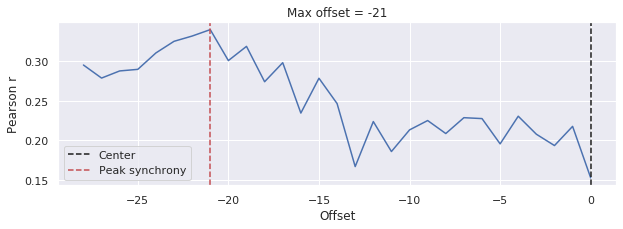

In [101]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

    

def get_crosscorr_df(df, s1, s2, lags):
    rs = [crosscorr(df[s1],df[s2], lag) for lag in lags]

    return pd.DataFrame({'Offset':lags, 'Pearson r':rs}).set_index('Offset')

def get_crosscorr_plot(df_lcorr):
    offset = df_lcorr['Pearson r'].abs().idxmax()
    f,ax=plt.subplots(figsize=(10,3))
    ax.plot(df_lcorr)
    ax.axvline(0,color='k',linestyle='--',label='Center')
    ax.axvline(offset,color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Max offset = {offset}', xlabel='Offset',ylabel='Pearson r')
    # ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
    # ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
    plt.legend()
    return plt

def get_series_plot(df, s1, s2, lag = 0):
    df = df.copy()
    
    df[s2] = df[s2].shift(lag)
#     f,ax=plt.subplots(figsize=(10,3))
    ax = df[[s1,s2]].plot()
    ax.set(title=f'Lag = {lag}')
    return plt

lags = range(-28,1)
df_lcorr = get_crosscorr_df(df_series, 'Estações', 'Daily', lags)


p = get_crosscorr_plot(df_lcorr)

p

<module 'matplotlib.pyplot' from '/home/luizcelso/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

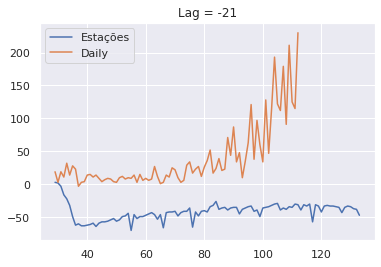

In [102]:
p = get_series_plot(df_series, 'Estações', 'Daily', lag = -21)
p

<module 'matplotlib.pyplot' from '/home/luizcelso/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

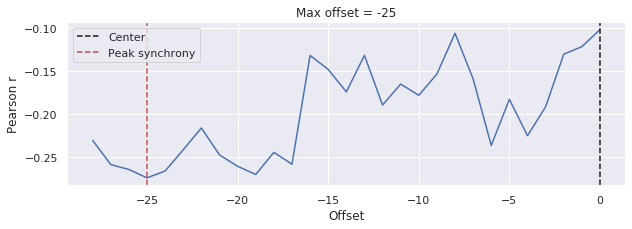

In [103]:
df_lcorr = get_crosscorr_df(df_series, 'Residencial', 'Daily', lags)


p = get_crosscorr_plot(df_lcorr)

p

In [104]:
df_reg = pd.read_csv(data_dir + 'epidemic/regionais-cwb/cases_interp.csv')

df_reg

Regional        Data    Casos  Obitos  CasosNovos  ObitosNovos
0         bairro novo  2020-05-15    36.00     nan         nan          nan
1         bairro novo  2020-05-16    37.31     nan        1.31          nan
2         bairro novo  2020-05-17    38.61     nan        1.30          nan
3         bairro novo  2020-05-18    39.91     nan        1.29          nan
4         bairro novo  2020-05-19    41.19     nan        1.29          nan
5         bairro novo  2020-05-20    42.47     nan        1.28          nan
6         bairro novo  2020-05-21    43.74     nan        1.27          nan
7         bairro novo  2020-05-22    45.00     nan        1.26          nan
8         bairro novo  2020-05-23    46.25     nan        1.25          nan
9         bairro novo  2020-05-24    47.49     nan        1.24          nan
10        bairro novo  2020-05-25    48.73     nan        1.23          nan
11        bairro novo  2020-05-26    50.00     nan        1.28          nan
12        bairro novo  2020-05-27    51.62     nan        1.61          nan
13        bairro novo  2020-05-28    53.61     nan        2.00          nan
14        bairro novo  2020-05-29    56.00     nan        2.39          nan
15        bairro novo  2020-05-30    58.77     nan        2.77          nan
16        bairro novo  2020-05-31    61.93     nan        3.16          nan
17        bairro novo  2020-06-01    65.47     nan        3.54          nan
18        bairro novo  2020-06-02    69.42     nan        3.94          nan
19        bairro novo  2020-06-03    73.81     nan        4.40          nan
20        bairro novo  2020-06-04    78.67     nan        4.86          nan
21        bairro novo  2020-06-05    84.00     nan        5.33          nan
22        bairro novo  2020-06-06    89.79     nan        5.79          nan
23        bairro novo  2020-06-07    96.05     nan        6.26          nan
24        bairro novo  2020-06-08   102.77     nan        6.72          nan
25        bairro novo  2020-06-09   109.75     nan        6.98          nan
26        bairro novo  2020-06-10   115.72     nan        5.97          nan
27        bairro novo  2020-06-11   120.47     nan        4.75          nan
28        bairro novo  2020-06-12   124.00    8.00        3.53          nan
29        bairro novo  2020-06-13   126.32    8.18        2.32         0.18
30        bairro novo  2020-06-14   127.41    8.34        1.10         0.17
31        bairro novo  2020-06-15   127.29    8.50       -0.12         0.15
32        bairro novo  2020-06-16   126.68    8.64       -0.62         0.14
33        bairro novo  2020-06-17   129.90    8.77        3.22         0.13
34        bairro novo  2020-06-18   137.67    8.89        7.77         0.12
35        bairro novo  2020-06-19   150.00    9.00       12.33         0.11
36        bairro novo  2020-06-20   166.88    9.10       16.88         0.10
37        bairro novo  2020-06-21   188.33    9.18       21.44         0.08
38        bairro novo  2020-06-22   214.32    9.25       26.00         0.07
39        bairro novo  2020-06-23   244.35    9.31       30.02         0.05
40        bairro novo  2020-06-24   275.23    9.29       30.88        -0.02
41        bairro novo  2020-06-25   306.45    9.18       31.22        -0.10
42        bairro novo  2020-06-26   338.00    9.00       31.55        -0.18
43        bairro novo  2020-06-27   369.88    8.73       31.88        -0.27
44        bairro novo  2020-06-28   402.10    8.38       32.22        -0.35
45        bairro novo  2020-06-29   434.65    7.95       32.55        -0.43
46        bairro novo  2020-06-30   467.52    7.52       32.86        -0.44
47        bairro novo  2020-07-01   500.54    7.51       33.02        -0.01
48        bairro novo  2020-07-02   533.70    8.00       33.16         0.49
49        bairro novo  2020-07-03   567.00    9.00       33.30         1.00
50        bairro novo  2020-07-04   600.44   10.50       33.44         1.50
51        bairro novo  2020-07-05   634.01   12.51       33.5

In [105]:
reg = 'bairro novo'

df = df_reg.query("Regional == @reg")

df = df.merge(df_mob_pr)

df

Regional        Data  Casos  Obitos  CasosNovos  ObitosNovos  Comércio e entretenimento  Mercados e farmácias  Parques  Estações  Trabalho  Residencial
0   bairro novo  2020-05-15  36.00     nan         nan          nan                     -37.00                 -1.00   -40.00    -35.00    -14.00        13.00
1   bairro novo  2020-05-16  37.31     nan        1.31          nan                     -41.00                  2.00   -40.00    -35.00    -11.00        11.00
2   bairro novo  2020-05-17  38.61     nan        1.30          nan                     -54.00                -13.00   -49.00    -45.00     -7.00        10.00
3   bairro novo  2020-05-18  39.91     nan        1.29          nan                     -35.00                 -8.00   -41.00    -38.00    -13.00        13.00
4   bairro novo  2020-05-19  41.19     nan        1.29          nan                     -36.00                 -8.00   -35.00    -36.00    -15.00        12.00
5   bairro novo  2020-05-20  42.47     nan        1.28          nan                     -35.00                 -2.00   -24.00    -34.00    -15.00        13.00
6   bairro novo  2020-05-21  43.74     nan        1.27          nan                     -33.00                  1.00   -23.00    -33.00    -15.00        12.00
7   bairro novo  2020-05-22  45.00     nan        1.26          nan                     -45.00                -10.00   -53.00    -41.00    -15.00        15.00
8   bairro novo  2020-05-23  46.25     nan        1.25          nan                     -45.00                  3.00   -53.00    -39.00    -12.00        13.00
9   bairro novo  2020-05-24  47.49     nan        1.24          nan                     -59.00                -15.00   -60.00    -49.00    -10.00        12.00
10  bairro novo  2020-05-25  48.73     nan        1.23          nan                     -33.00                 -4.00   -43.00    -36.00    -13.00        13.00
11  bairro novo  2020-05-26  50.00     nan        1.28          nan                     -35.00                 -5.00   -37.00    -35.00    -14.00        12.00
12  bairro novo  2020-05-27  51.62     nan        1.61          nan                     -34.00                 -3.00   -26.00    -34.00    -13.00        13.00
13  bairro novo  2020-05-28  53.61     nan        2.00          nan                     -31.00                  1.00   -25.00    -32.00    -13.00        12.00
14  bairro novo  2020-05-29  56.00     nan        2.39          nan                     -32.00                  6.00   -35.00    -30.00    -10.00        13.00
15  bairro novo  2020-05-30  58.77     nan        2.77          nan                     -36.00                  9.00   -36.00    -29.00     -3.00        10.00
16  bairro novo  2020-05-31  61.93     nan        3.16          nan                     -49.00                 -4.00   -46.00    -39.00      1.00         9.00
17  bairro novo  2020-06-01  65.47     nan        3.54          nan                     -34.00                 -2.00   -47.00    -36.00    -11.00        12.00
18  bairro novo  2020-06-02  69.42     nan        3.94          nan                     -37.00                 -4.00   -47.00    -38.00    -14.00        13.00
19  bairro novo  2020-06-03  73.81     nan        4.40          nan                     -33.00                  1.00   -34.00    -34.00    -12.00        13.00
20  bairro novo  2020-06-04  78.67     nan        4.86          nan                     -32.00                  1.00   -42.00    -35.00    -14.00        13.00
21  bairro novo  2020-06-05  84.00     nan        5.33          nan                     -27.00                 11.00   -44.00    -30.00    -10.00        12.00
22  bairro novo  2020-06-06  89.79     nan        5.79          nan                     -31.00                 13.00   -48.00    -31.00     -5.00        11.00
23  bairro novo  2020-06-07  96.05     nan        6.26          nan                     -43.00                  0.00   -47.00    -39.00      2.00        10.00
24  bairro novo  2020-06-08 102.

In [106]:
df_lcorr = get_crosscorr_df(df, 'Estações', 'CasosNovos', lags)

df_lcorr

Pearson r
Offset           
-28          0.33
-27          0.32
-26          0.36
-25          0.37
-24          0.39
-23          0.36
-22          0.36
-21          0.35
-20          0.23
-19          0.23
-18          0.23
-17          0.27
-16         -0.05
-15         -0.00
-14          0.02
-13         -0.08
-12         -0.07
-11         -0.03
-10          0.02
-9           0.06
-8           0.09
-7           0.13
-6           0.07
-5           0.10
-4           0.11
-3           0.11
-2           0.07
-1           0.03
 0          -0.11

In [107]:

df_corrs = pd.DataFrame(index=lags)

df_corrs

Empty DataFrame
Columns: []
Index: [-28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0]

In [108]:
def get_corrs(df_reg, df_mob_pr, var):
    df_corrs = pd.DataFrame(index=lags)
    regs = df_reg['Regional'].unique()

    for reg in regs:
        print(reg)
        df = df_reg.query("Regional == @reg")
        df = df.merge(df_mob_pr)
        df_lcorr = get_crosscorr_df(df, var, 'CasosNovos', lags)
        df_lcorr.columns = [reg]
        df_corrs = df_corrs.join(df_lcorr)
    return df_corrs

df_corrs = get_corrs(df_reg, df_mob_pr, 'Estações')

df_corrs

bairro novo
boa vista
boqueirao
cajuru
cic
matriz
pinheirinho
portao
santa felicidade
tatuquara


bairro novo  boa vista  boqueirao  cajuru   cic  matriz  pinheirinho  portao  santa felicidade  tatuquara
-28         0.33       0.24       0.32    0.28  0.28    0.13         0.34    0.26              0.14       0.07
-27         0.32       0.29       0.32    0.31  0.31    0.25         0.32    0.30              0.26       0.21
-26         0.36       0.37       0.36    0.37  0.37    0.35         0.36    0.38              0.38       0.32
-25         0.37       0.42       0.37    0.39  0.40    0.41         0.36    0.41              0.46       0.37
-24         0.39       0.43       0.39    0.41  0.42    0.42         0.39    0.43              0.47       0.38
-23         0.36       0.39       0.36    0.37  0.37    0.39         0.35    0.38              0.40       0.35
-22         0.36       0.35       0.36    0.35  0.35    0.34         0.36    0.34              0.32       0.32
-21         0.35       0.32       0.35    0.34  0.32    0.33         0.34    0.32              0.27       0.33
-20         0.23       0.23       0.24    0.25  0.22    0.29         0.22    0.23              0.22       0.32
-19         0.23       0.23       0.24    0.25  0.21    0.29         0.22    0.23              0.20       0.33
-18         0.23       0.23       0.24    0.25  0.20    0.31         0.21    0.22              0.20       0.36
-17         0.27       0.26       0.28    0.29  0.24    0.33         0.26    0.26              0.22       0.39
-16        -0.05       0.02      -0.04    0.02 -0.03    0.14        -0.08    0.02              0.08       0.19
-15        -0.00       0.04       0.00    0.05  0.01    0.12        -0.02    0.05              0.08       0.18
-14         0.02       0.04       0.02    0.06  0.02    0.08        -0.00    0.06              0.06       0.15
-13        -0.08      -0.05      -0.08   -0.03 -0.07   -0.01        -0.10   -0.02             -0.02       0.07
-12        -0.07      -0.08      -0.08   -0.04 -0.08   -0.07        -0.10   -0.04             -0.07       0.02
-11        -0.03      -0.05      -0.04    0.00 -0.04   -0.05        -0.05    0.01             -0.04       0.03
-10         0.02      -0.01       0.00    0.04  0.00   -0.02        -0.01    0.04             -0.01       0.05
-9          0.06       0.02       0.04    0.07  0.05    0.01         0.04    0.07              0.02       0.06
-8          0.09       0.06       0.08    0.10  0.09    0.06         0.08    0.09              0.06       0.09
-7          0.13       0.10       0.11    0.12  0.12    0.10         0.11    0.11              0.10       0.11
-6          0.07       0.07       0.06    0.07  0.08    0.09         0.05    0.07              0.10       0.08
-5          0.10       0.09       0.09    0.09  0.12    0.11         0.09    0.08              0.12       0.07
-4          0.11       0.08       0.10    0.09  0.12    0.10         0.10    0.07              0.09       0.06
-3          0.11       0.07       0.09    0.08  0.10    0.09         0.10    0.05              0.06       0.06
-2          0.07       0.03       0.06    0.05  0.07    0.07         0.06    0.02              0.02       0.04
-1          0.03      -0.00       0.02    0.01  0.02    0.05         0.01   -0.01             -0.00       0.03
0          -0.11      -0.10      -0.11   -0.10 -0.10   -0.02        -0.13   -0.11             -0.07      -0.02

bairro novo
boa vista
boqueirao
cajuru
cic
matriz
pinheirinho
portao
santa felicidade
tatuquara
******Comércio e entretenimento*******
bairro novo        0.43
boa vista          0.41
boqueirao          0.44
cajuru             0.44
cic                0.41
matriz             0.43
pinheirinho        0.42
portao             0.42
santa felicidade   0.37
tatuquara          0.45
dtype: float64
bairro novo        -17
boa vista          -17
boqueirao          -17
cajuru             -17
cic                -17
matriz             -17
pinheirinho        -17
portao             -17
santa felicidade   -17
tatuquara          -17
dtype: int64


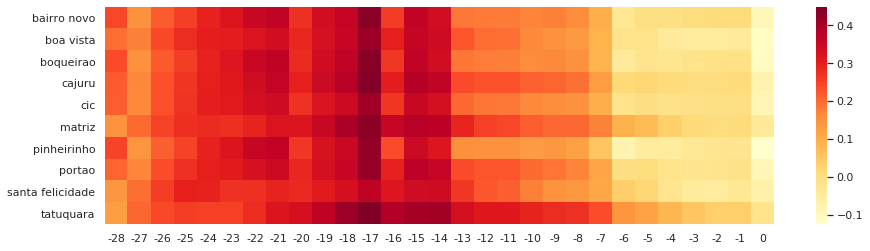

bairro novo
boa vista
boqueirao
cajuru
cic
matriz
pinheirinho
portao
santa felicidade
tatuquara
******Mercados e farmácias*******
bairro novo        0.52
boa vista          0.46
boqueirao          0.52
cajuru             0.49
cic                0.48
matriz             0.50
pinheirinho        0.52
portao             0.46
santa felicidade   0.48
tatuquara          0.54
dtype: float64
bairro novo        -21
boa vista          -21
boqueirao          -21
cajuru             -21
cic                -21
matriz             -17
pinheirinho        -21
portao             -21
santa felicidade   -24
tatuquara          -17
dtype: int64


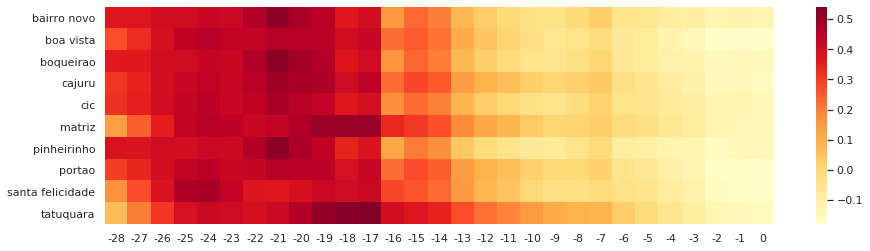

bairro novo
boa vista
boqueirao
cajuru
cic
matriz
pinheirinho
portao
santa felicidade
tatuquara
******Parques*******
bairro novo        0.17
boa vista          0.15
boqueirao          0.17
cajuru             0.15
cic                0.16
matriz             0.15
pinheirinho        0.18
portao             0.16
santa felicidade   0.19
tatuquara          0.16
dtype: float64
bairro novo         -8
boa vista           -7
boqueirao           -8
cajuru              -8
cic                 -8
matriz             -26
pinheirinho         -8
portao              -9
santa felicidade   -25
tatuquara          -26
dtype: int64


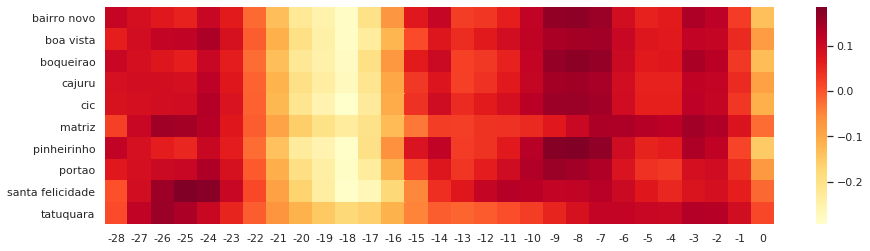

bairro novo
boa vista
boqueirao
cajuru
cic
matriz
pinheirinho
portao
santa felicidade
tatuquara
******Estações*******
bairro novo        0.39
boa vista          0.43
boqueirao          0.39
cajuru             0.41
cic                0.42
matriz             0.42
pinheirinho        0.39
portao             0.43
santa felicidade   0.47
tatuquara          0.39
dtype: float64
bairro novo        -24
boa vista          -24
boqueirao          -24
cajuru             -24
cic                -24
matriz             -24
pinheirinho        -24
portao             -24
santa felicidade   -24
tatuquara          -17
dtype: int64


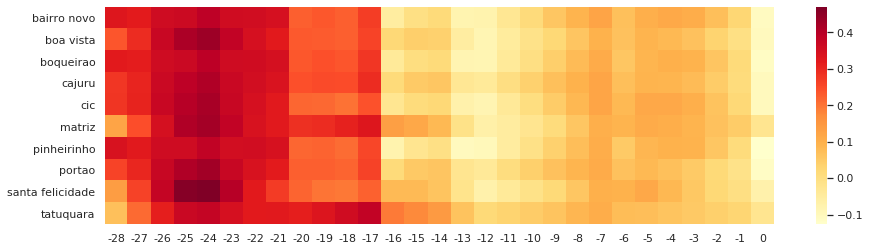

bairro novo
boa vista
boqueirao
cajuru
cic
matriz
pinheirinho
portao
santa felicidade
tatuquara
******Trabalho*******
bairro novo        0.53
boa vista          0.54
boqueirao          0.52
cajuru             0.51
cic                0.52
matriz             0.52
pinheirinho        0.54
portao             0.53
santa felicidade   0.58
tatuquara          0.47
dtype: float64
bairro novo        -26
boa vista          -24
boqueirao          -26
cajuru             -24
cic                -24
matriz             -24
pinheirinho        -26
portao             -24
santa felicidade   -24
tatuquara          -24
dtype: int64


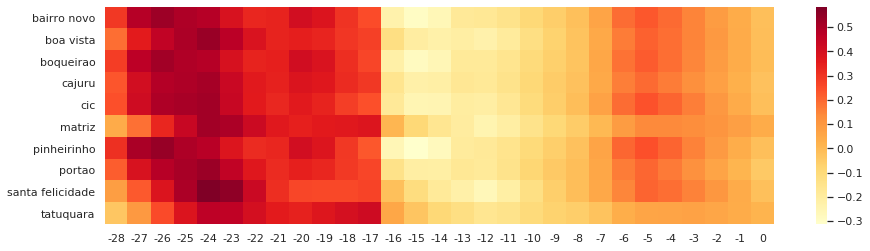

bairro novo
boa vista
boqueirao
cajuru
cic
matriz
pinheirinho
portao
santa felicidade
tatuquara
******Residencial*******
bairro novo        0.17
boa vista          0.14
boqueirao          0.17
cajuru             0.15
cic                0.15
matriz             0.18
pinheirinho        0.18
portao             0.16
santa felicidade   0.14
tatuquara          0.23
dtype: float64
bairro novo          0
boa vista            0
boqueirao            0
cajuru               0
cic                  0
matriz             -28
pinheirinho          0
portao               0
santa felicidade   -28
tatuquara          -28
dtype: int64


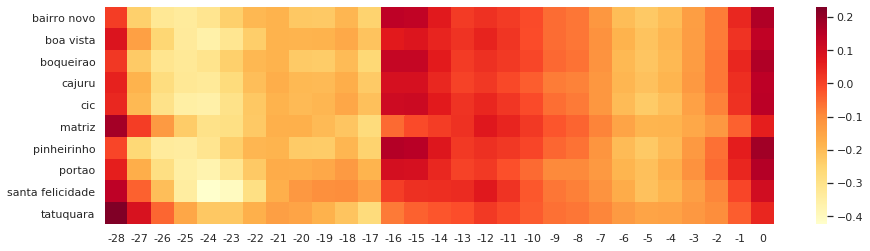

{'Comércio e entretenimento': (0.44905837715816166, 0.4237439156060515, 0.022139208122527468), 'Mercados e farmácias': (0.540751744185482, 0.4969157016134826, 0.027417035903071256), 'Parques': (0.29342968518963897, 0.267625898483537, 0.037223790134074924), 'Estações': (0.470021641355128, 0.41463223893743767, 0.026342860266909702), 'Trabalho': (0.5835263097155968, 0.5255205223520281, 0.028959015242660768), 'Residencial': (0.4239060377741579, 0.33976713446129125, 0.041395145744635535)}


In [112]:
var_max = {}
for var in labels:
    df_corrs = get_corrs(df_reg, df_mob_pr, var)
    print("******{}*******".format(var))
    print(df_corrs.max())
    print(df_corrs.idxmax())
    var_max[var] = (df_corrs.abs().max().max(), df_corrs.abs().max().mean(), df_corrs.abs().max().std())
    plt.figure(figsize=(15,4))

    sns.heatmap(df_corrs.T, cmap='YlOrRd')
    plt.show()
print(var_max)   



In [110]:
df_corrs.idxmax()

bairro novo          0
boa vista            0
boqueirao            0
cajuru               0
cic                  0
matriz             -28
pinheirinho          0
portao               0
santa felicidade   -28
tatuquara          -28
dtype: int64

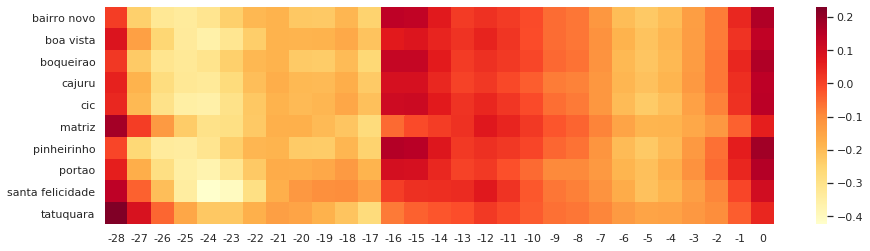

In [111]:
plt.figure(figsize=(15,4))

sns.heatmap(df_corrs.T, cmap='YlOrRd')